In [1]:
%cd ..

/home/elias/work/descript-research-test


In [66]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from data import DataSynthesis
from models import HandWritingPrediction, HandWritingSynthesis
from utils import plot_stroke

In [67]:
np.random.seed()

In [68]:
hwp = HandWritingPrediction()

In [71]:
strokes = hwp.infer(None, inf_type='max', weights_path='models/trained/stacked_600_epochs.h5')

Creating a series of strokes:   1%|          | 5/984 [00:00<00:21, 45.92it/s]


Generating a random sentence of  984 strokes



Creating a series of strokes: 100%|██████████| 984/984 [00:18<00:00, 52.81it/s]


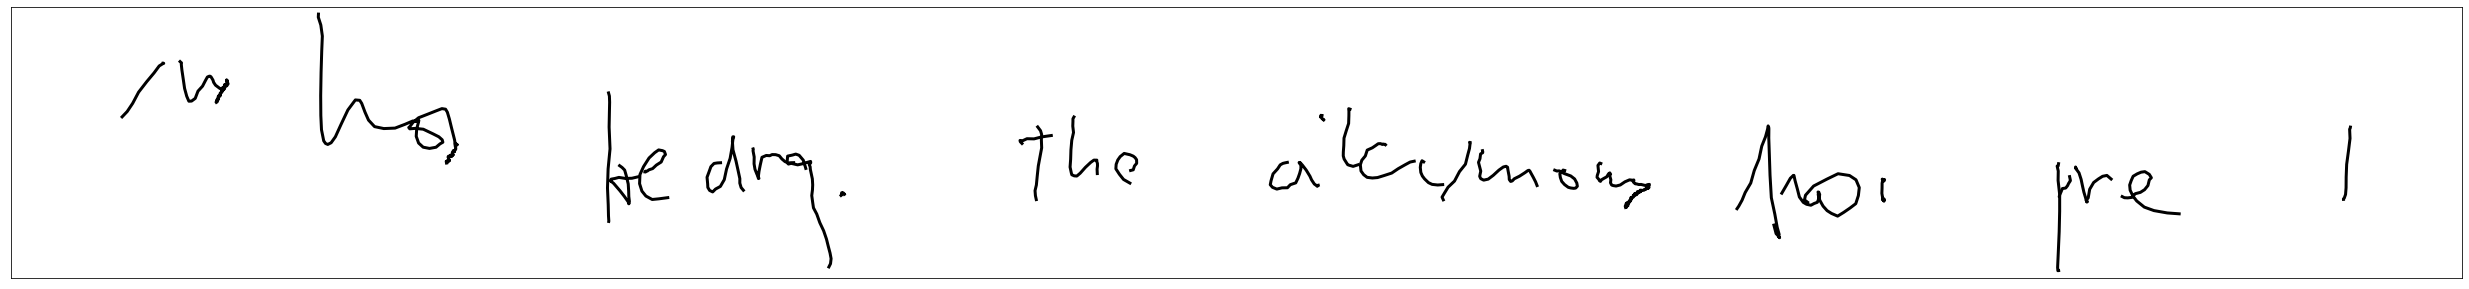

In [72]:
plot_stroke(strokes)

# Synthesis

In [3]:
d = DataSynthesis()
generator = d.batch_generator(shuffle=False)
_, sentence, target = next(generator)

In [4]:
# _, sentence, target = next(generator)

In [5]:
hws = HandWritingSynthesis()

In [6]:
hws.make_model(load_weights='tmp/model_space_full_synthesis_44.h5')

In [43]:
sentence = tf.dtypes.cast(d.prepare_text('in the abdundance of peace"'), float)
strokes, windows, phis, kappas = hws.infer(sentence, seed=18)

Writing,  1299 strokes computed
Sampling finished, produced sequence of length : 1300


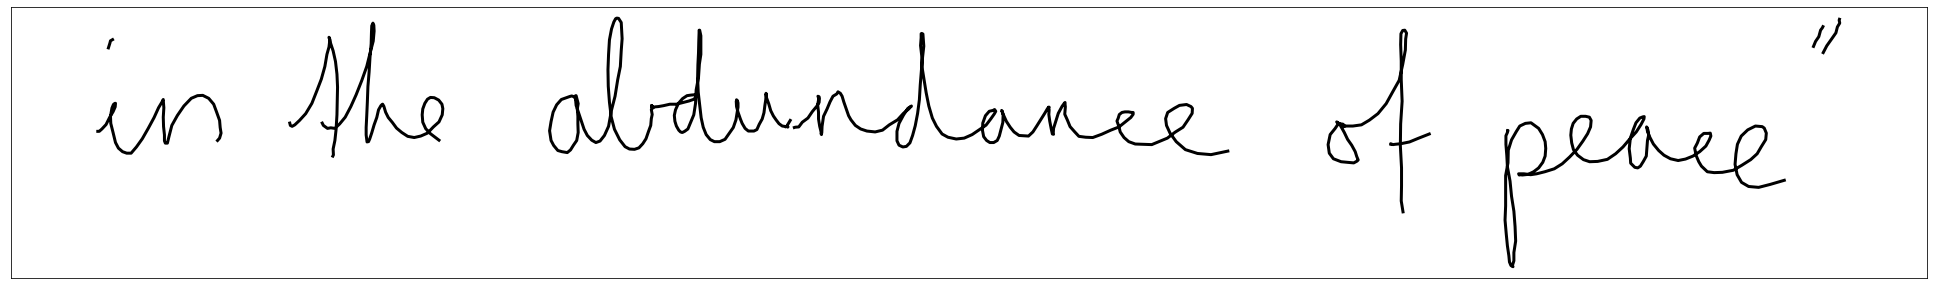

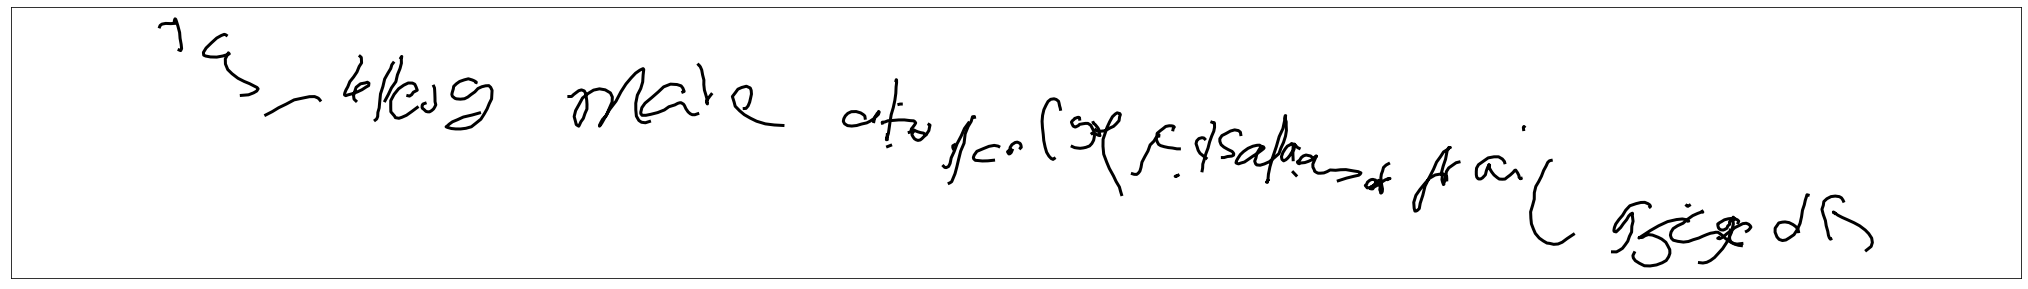

In [65]:
plot_stroke(tf.gather(target, [2, 0, 1], axis=2)[0])
plot_stroke(strokes)

In [45]:
len(windows) - np.sum([tf.reduce_all(x == 0).numpy() for x in windows])

96

In [46]:
time = []
for i, _ in enumerate(kappas):
    time += [i] * 10

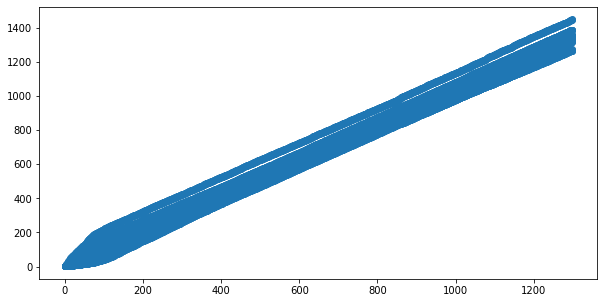

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(time, [x for l in kappas for x in l.numpy()[0]])

In [48]:
win = np.stack([np.squeeze(x.numpy()) for x in windows], axis=1)
weights = np.stack([np.squeeze(x.numpy()) for x in phis], axis=1)

(0, 150)

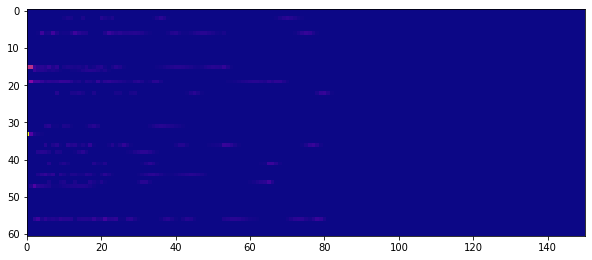

In [49]:
plt.figure(figsize=(10, 5))
plt.imshow(win, cmap='plasma')
plt.xlim(0, 150)

(0, 130)

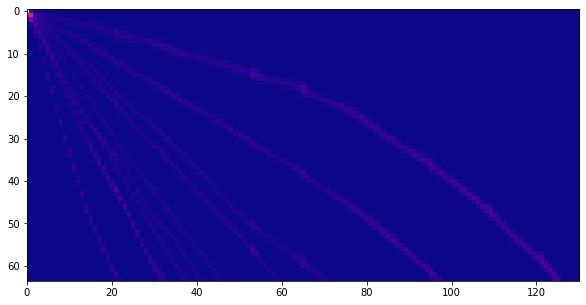

In [57]:
plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap='plasma')
plt.xlim(0, 130)

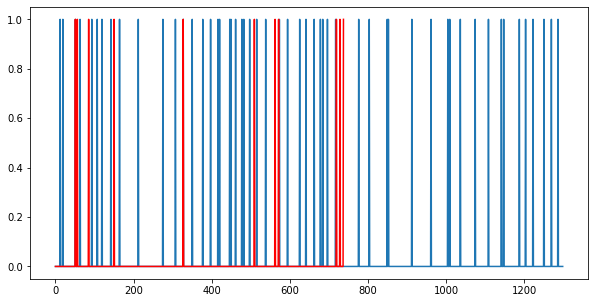

In [51]:
# Pen lifted or not

plt.figure(figsize=(10, 5))
plt.plot(strokes[:, 0])
plt.plot(target[0][:, 2], 'r')

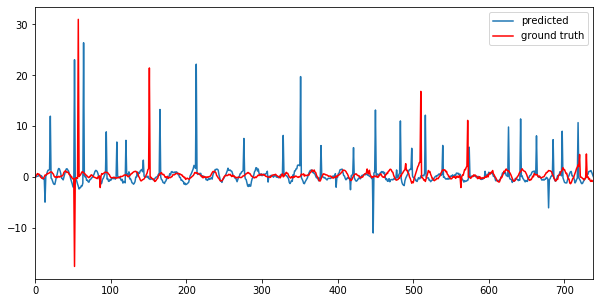

In [64]:
# x offset

plt.figure(figsize=(10, 5))
plt.plot(strokes[:, 1], label='predicted')
plt.plot(target[0][:, 0], 'r', label='ground truth')
plt.xlim(0, 738)
plt.legend()

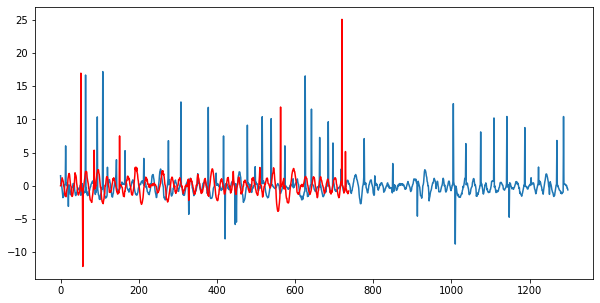

In [53]:
# y offset

plt.figure(figsize=(10, 5))
plt.plot(strokes[:, 2])
plt.plot(target[0][:, 1], 'r')